第13回の演習です。前回、Kerasで構築したニューラルネットワークに対して、ハイパーパラメータを調整します。
左上の「ファイル」＞「ドライブにコピーを保存」を選択して、Google DriveにNotebookを保存します。ご自身のGoogleドライブの"Colab Notebooks"フォルダで、保存したNotebookを右クリックし、「アプリで開く」＞「Google Colaboratory」を選択します。その上で、各コードを実行するには、以下のコマンドを実行してください。実行は「再生」ボタンを押します。

In [ ]:
print("Chapter 13")

Chapter 13


# ニューラルネットワークのハイパーパラメータの調整
前回、Kerasでニューラルネットワークを構築し、Fashion-MNISTデータセットのアイテム画像を認識しました。ところが、その正確度（識別率）は80%弱で、scikit-learnライブラリのニューラルネットワークよりも悪化しています。これは未だ、ハイパーパラメータの調整をやっていないからです。そこで、ハイパーパラメータを調整していきます。

## GPUの利用
時間がかかるので、GPUを使います。Coogle Colaboratoryのメニュー「ランライム」をクリックし、「ランタイムのタイプを変更」を選択します。「ハードウェアアクセラレータ」を"GPU"に変更します。これで計算処理が多少速く終了するようになるでしょう。ただ、「Colabでの使用量上限に達したため、現在GPUに接続できません」というメッセージが出ると、GPUが割り当てられないこともあります。

## データセットの用意と前処理
まずはデータセットを用意し、前処理を済ませます。これらはこの回では共通の操作ですので、一度実行しておけばよいでしょう。ただし、「ランタイムリセット」されてしまったら再実行します。

In [ ]:
# Fashion-MNISTデータセット
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

# Fashion-MNISTのデータ形状
print(train_data.shape)         # 学習用データ
print(train_label.shape)        # 学習用データのラベル
print(test_data.shape)          # 検証用データ
print(test_label.shape)         # 検証用データのラベル


# データの形状を確認------------------------------
import numpy as np
# データ抽出
train_data0 = train_data[0:10000, : , : ]
train_label0 = train_label[0:10000]
valid_data0 = train_data[10000:11000, : , : ]
valid_label0 = train_label[10000:11000]

# データ型
print(train_data0.dtype, valid_data0.dtype)
print(train_data0.shape, valid_data0.shape)

# uint8 -> float32
train_data1 = train_data0.astype("float32") / 255
valid_data1 = valid_data0.astype("float32") / 255

# データ型
print(train_data1.dtype, valid_data1.dtype)
print(train_data1.shape, valid_data1.shape)

print("学習用データ")
print(train_data1.min(), "-", train_data1.max())
print(train_label0.min(), "-", train_label0.max())
print("検証用データ")
print(valid_data1.min(), "-", valid_data1.max())
print(valid_label0.min(), "-", valid_label0.max())


# one-hotベクトルに変換----------------------
# keras.utilsからto_categoricalをインポート
from tensorflow.keras.utils import to_categorical

# ラベルの表示
print("学習用", train_label0, len(train_label0))
print("検証用", valid_label0, len(valid_label0))

# one-hot vector
train_label1 = to_categorical(train_label0)
valid_label1 = to_categorical(valid_label0)

print("学習用", train_label1, len(train_label1))
print("検証用", valid_label1, len(valid_label1))

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
uint8 uint8
(10000, 28, 28) (1000, 28, 28)
float32 float32
(10000, 28, 28) (1000, 28, 28)
学習用データ
0.0 - 1.0
0 - 9
検証用データ
0.0 - 1.0
0 - 9
学習用 [9 0 0 ... 0 6 6] 10000
検証用 [8 7 6 8 7 7 2 0 5 3 5 5 1 3 9 4 1 9 3 2 8 2 9 3 4 5 1 0 3 2 8 5 3 8 2 2 9
 7 7 9 9 1 2 6 7 6 6 6 6 7 3 7 8 5 9 5 9 1 5 9 8 3 6 1 1 0 3 3 1 2 9 8 9 5
 1 0 6 2 3 0 0 8 8 5 7 3 6 9 7 3 6 4 8 5 0 8 3 6 7 1 5 1 7 6 4 1 6 9 8 1 1
 7 7 0 7 4 9 4 2 9 9 9 6 5 2 3 5 6 5 1 9 6 1 5 6 9 3 5 3 5 3 2 7 0 9 1 1 2
 1 3 6 4 8 4 1 3 2 6 2 0 9 5 8 6 5 5 6 8 0 8 3 9 6 9 8 3 2 5 8 3 9 0 9 9 8
 1 3 8 4 9 9 0 3 0 0 6 7 8 6 6 4 6 3 9 0 4 6 7 2 5 6 2 9 7 0 2 2 3 8 4 7 6
 8 7 3 6 2 1 3 7 0 4 7 7 5 9 4 9 4 7 1 5 4 6 2 7 1 6 1 4 5 5 8 2 9 9 9 4 7
 7 5 2 0 9 1 5 0 4 9 6 8 8 3 3 6 2 6 4 5 8 0 5 2 3 4 9 2 8 5 7 4 4 0 5 3 5
 3 5 3 0 0 4 5 0 1 7 6 7 9 0 8 1 4 9 0 6 9 8 8 9 2 9 3 4 2 2 5 9 9 4 1 9 4
 4 5 1 9 2 6 1 2 5 7 3 9 9 2 2 7 1 5 0 9 6 6

## ネットワークの中間層を増やす
前回のニューラルネットワークの構成に対して中間層を幾つか追加し、層を少しだけ深くすることから始めましょう。以下のプログラムコードは前回のものと同じですが、ネットワークの中間層を1層増やしています。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "sigmoid"))
model.add(Dense(unit_middle2, activation = "sigmoid"))

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
(10000, 28, 28) (10000, 10)
(1000, 28, 28) (1000, 10)
Epoch 1/30
157/157 [==============================] - 6s 5ms/step - loss: 1.9981 - accuracy: 0.3259 - val_loss: 1.6723 - val_acc

## ドロップアウト
ドロップアウトは過学習を抑制する仕組みの一つで、ネットワークの層におけるユニットの一部がepochごとにランダムに削除されます。model.add()でドロップアウトを追加し、ユニットの削除割合を指定します。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "sigmoid"))    # 中間層1
model.add(Dropout(0.5))                                   # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "sigmoid"))    # 中間層2
model.add(Dropout(0.5))                                   # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

## 活性化関数
活性化関数は、入力信号の総和を出力信号に変換する関数です。この場合、入力の総和を求めるとき、一般には重みが付けられます。非線形関数が用いられ、先ほどはシグモイド関数が設定されていました。その他によく用いられる活性化関数として、ReLU（Rectified Linear Unit）があります。一応、シグモイド関数とReLU、その微分を図示しておきます。勾配降下法では活性化関数の微分をかける操作を行うのですが、シグモイド関数だとあまり大きな値は取りえません。

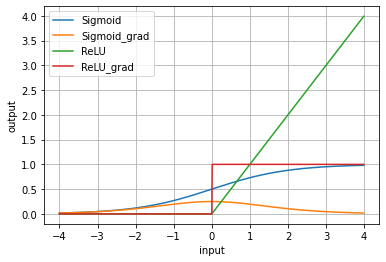

In [ ]:
# Sigmoid & ReLU
import numpy as np
import matplotlib.pylab as plt

# Sigmoid
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

# Sigmoidの導関数
def sigmoid_grad(x):
    y = sigmoid_func(x)
    return (1 - y) * y

#ReLU関数
def relu_func(x):
    return np.maximum(0, x) #0とxを比較して大きい方の数値を返す

# ReLUの導関数
def relu_grad(x):
    return 1 * (x > 0)

x = np.arange(-4, 4, 0.01)
y_sigmoid = sigmoid_func(x)
y_sig_grad = sigmoid_grad(x)
z_relu = relu_func(x)
z_relu_grad = relu_grad(x)

plt.plot(x, y_sigmoid, label = "Sigmoid")
plt.plot(x, y_sig_grad, label = "Sigmoid_grad")
plt.plot(x, z_relu, label = "ReLU")
plt.plot(x, z_relu_grad, label = "ReLU_grad")
plt.legend()

plt.xlabel("input")
plt.ylabel("output")
plt.grid()
plt.show()

では、活性化関数をReLUに変更してみましょう。ニューラルネットワークの構成は先のものと同じです。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

## 最適化関数
最適化関数（optimizer）は、損失関数を重みで微分し、学習率や過去の重みの更新量を踏まえて、どのように重みの更新に反映するかを指定します。これまで、SGD（確率的勾配降下法）を設定していました。ここで、Adam（Adaptive Moment Estimation）を使ってみます。Adamは、振動抑制に移動平均するmomentumと、学習係数を調整するRMSPropとを組み合わせたような感じです。
tensorflow.keras.optimizersからAdamをインポートし、model.compileのoptimizerに"Adam"を指定します。β1は一次モーメントの減衰率、β2は二次モーメントの減衰率です。この場合、学習係数を小さめに取らないと精度が出ません。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.001         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import Adam

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = Adam(learning_rate, beta_1=0.9, beta_2=0.999),   # Adam
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

## 学習係数
学習係数は学習率とも呼ばれ、ネットワークの層の重みをどのくらい変更するかを決めるものです。損失関数に対して適切な学習係数を設定することは極めて重要です。Adamの特別な場合がSGDと考えることもできますから、最適化関数を"SGD"に戻します。ただし、学習係数を"0.001"に設定しています。重みの更新量が少なくなりますので、"epochs = 30"では収束しきらないようです（収束に時間がかかる）。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.001         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 64             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

## ミニバッチ学習
ニューラルネットワークのモデルを学習するとき、モデルに与える学習データの数をバッチサイズといいます。このバッチサイズで学習（ミニバッチ学習）を行い、損失関数の勾配を求めて重みの更新を行います。バッチサイズの難しさは他のパラメータと関係している点にあります。バッチサイズは主に、データ1個に対する感度、1エポックの計算時間、メモリ使用量にきいてきます。バッチサイズが小さいと、1つのデータに反応しやすくなります（この場合、学習係数を調整する）。バッチサイズが大きいと、データ全体の特徴を捉える感じになります。バッチサイズが小さいと、重み更新の回数は多くなりますから計算時間はかかります。バッチサイズの単位でデータを読みますから、バッチサイズが小さい方が、メモリ使用量は少なくて済みます。以下ではバッチサイズを"batch_size = 32"に設定します（学習係数は"0.1"に戻す）。

In [ ]:
# ニューラルネットワークの構成----------------------------
# Neural Network
img_row = 28                # 入力層のユニット数
img_col = 28
unit_middle1 = 256          # 中間層のユニット数
unit_middle2 = 128
unit_output = 10            # 出力層のユニット数
learning_rate = 0.1         # 学習係数
epochs = 30                 # 学習を繰り返す回数（エポック数）
batch_size = 32             # ミニバッチのサイズ


# ニューラルネットワークの構築-----------------------------
# keras.modelsからSequentialをインポート
from tensorflow.keras.models import Sequential
# keras.layersからDenseとFlattenをインポート
from tensorflow.keras.layers import Dense, Flatten, Dropout     # Dropoutを追加
# keras.optimizersからSGDをインポート
from tensorflow.keras.optimizers import SGD

model = Sequential()

# 入力層
model.add(Flatten(input_shape = (img_row, img_col)))

# 中間層
model.add(Dense(unit_middle1, activation = "relu"))    # 中間層1
model.add(Dropout(0.5))                                # 中間層でドロップアウト
model.add(Dense(unit_middle2, activation = "relu"))    # 中間層2
model.add(Dropout(0.5))                                # 中間層でドロップアウト

# 出力層
model.add(Dense(unit_output, activation = "softmax"))

# モデルの概要を出力
model.summary()


# モデルのコンパイル---------------------------------
model.compile(
    optimizer = SGD(learning_rate),            # SGD
    loss = "categorical_crossentropy",         # 交差エントロピー誤差
    metrics = ["accuracy"]                     # 学習評価の指標はaccuracy
)


# 学習を実行し、結果を出力する
print(train_data1.shape, train_label1.shape)
print(valid_data1.shape, valid_label1.shape)
history = model.fit(train_data1,
                    train_label1,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data = (valid_data1, valid_label1)
)



# 検証-----------------------------------------------
# データ抽出
test_data0 = test_data[0:2000, : , : ]
test_label0 = test_label[0:2000]

# データ型
print(test_data0.dtype)
print(test_data0.shape)

# uint8 -> float32
test_data1 = test_data0.astype("float32") / 255

# データ型
print(test_data1.dtype)
print(test_data1.shape)

print("評価用データ")
print(test_data1.min(), "-", test_data1.max())
print(test_label0.min(), "-", test_label0.max())


# ラベルの表示
print("検証用", test_label0, len(test_label0))

# one-hot vector
test_label1 = to_categorical(test_label0)
print("検証用", test_label1, len(test_label1))


# 検証
score = model.evaluate(test_data1, test_label1, verbose = 1)
# 検証用データの誤り率
print("Test Loss : ", score[0])
# 検証用データの正確度
print("Test Accuracy : ", score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr